<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-2-/blob/main/Distribucio_Weibull_por_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np    #Importamos las librerias a utilizar
import matplotlib.pyplot as plt

###Vamos a simular por algoritmo de Metropoli-Hasting la distribución de Weibull

$$f(x) =  λα(\lambda x)^{\alpha - 1} e^{-(\lambda x)^{\alpha}} $$

In [2]:
#Comando para que que los gráficos generados por matplotlib se muestren directamente en el notebook
%matplotlib inline

In [3]:
def f(x,alp,lam):     #Definimos nuestra distribucion Weibull
 return lam*alp*(lam*x)**(alp-1)*np.exp(-(lam*x)**alp)

In [4]:
lamda = 1
alfa = 5     #Definimos los parametros de la distribucion
delta = 0.5

In [5]:
n = 100000
x = np.zeros(n)   # Creamos un arreglo de tamaño 'n' lleno de ceros para almacenar las muestras.
x[0] = 0.5    # Inicializamos la primera muestra (estado inicial) en 2.
acept = 0         # Contador para el número de propuestas aceptadas.

#La sigiente seccion del codigo el nuestro algoritmo Motropoli-Hasting
for i in range(0,n-1):
  y = x[i]+np.random.uniform(-delta,delta)  # Propuesta: generamos un nuevo valor 'y' sumando un valor aleatorio uniformemente distribuido entre (-delta, delta) al valor actual x[i]
  if y > 0:         #Condicion de que el valor 'y' debe ser positivo esto por la distribucion Weibull siempre son positivos
    if np.random.rand() < min(1,f(y,alfa,lamda)/f(x[i],alfa,lamda)):
      x[i+1] = y   # Si la propuesta es aceptada, actualizamos el valor de la muestra.
      acept += 1        # Incrementamos el contador de aceptaciones.
    else:
      x[i+1] = x[i]   # Si la propuesta es rechazada, mantenemos el valor actual de la muestra.
  else:
    x[i+1] = x[i]   # Si el valor 'y' es negativo, mantenemos el valor actual de la muestra.

In [6]:
print("La aceptacion fue del ",acept/n*100,"%")  #Imprimimos el porcentaje de aceptacion

La aceptacion fue del  57.532000000000004 %


In [8]:
print(np.mean(x))  #Imprimimos el valor medio de las muestras y desvacion estandar
print(np.std(x))

0.9185230452204809
0.20928115885262946


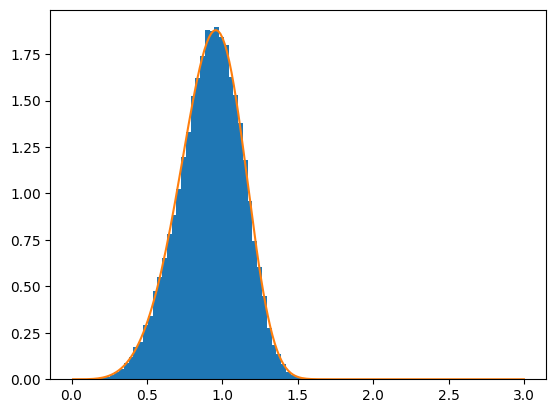

In [9]:
plt.hist(x,density=True,bins=50)  #Graficamos el histograma de las muestras y la funcion Weibull
xs = np.linspace(0.01,3,200)
plt.plot(xs,f(xs,alfa,lamda))

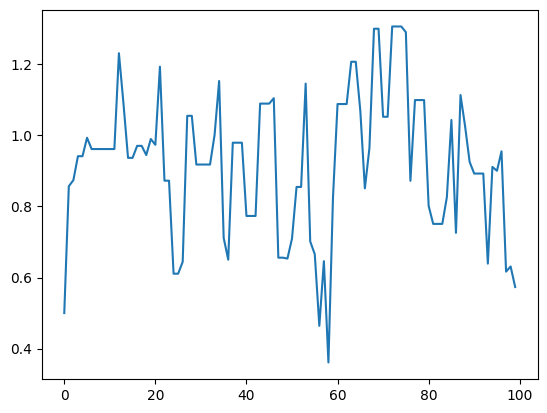

In [10]:
plt.plot(x[:100]) # Opcionalmente, graficamos las primeras 100 muestras para visualizar cómo evolucionan las muestras.